In [99]:
# Import Required Libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [100]:
# Define Function x*exp(-x)
f = np.vectorize(lambda x : x*np.exp(-x))

In [101]:
# Composite Trapezoidal Rule
def trap(f,a,b,n):
  h = (b-a)/n
  if n == 1:
    return h/2 * (f(a) + f(b))
  else:
    xs = a + np.arange(1,n)*h
    f_interior = f(xs)
    return h/2 * (f(a) + f(b)) + h * sum(f_interior)

In [102]:
trap(f,0,3,10)

0.7926385527355757

## Problem \#15
Here we numerically compute the integral,
\begin{equation*}
\int_0^3xe^{-x}dx = 1 - \frac{4}{e^3}
\end{equation*}
using the Composite Trapezoid Rule, doing so yields
\begin{array}{c|c|c|c} h & approx & true & error \\ \hline{} 0.3 & .793 & .801 & .00821\end{array}
thus giving us an error of,
\begin{equation*}
error = .00821
\end{equation*}

In [103]:
# Parameters
n = 10
a = 0
b = 3
h = (b-a)/n

# True 
exact = 1- 4/np.exp(3)

# Estimate
estimate = trap(f,a,b,n)

# Compute Error
err = abs(estimate - exact);

# Display Results
print("h        | Estimate   | Exact    | Error ")
print("%8.2e | %8.2e   | %8.2e | %8.2e "%(h, estimate, exact, err))

h        | Estimate   | Exact    | Error 
3.00e-01 | 7.93e-01   | 8.01e-01 | 8.21e-03 


## Problem \#16
Here we do something similar as above, but with a parameter sweep using $n$ subintervals for $n = 1,2,4,8,\dots, 2^{30}$.

In [104]:
# Parameters
a = 0
b = 3

# Exact
exact = 1- 4/np.exp(3)

estimates = [0] * 20
errors =  [0] * 20
hs =  [0] * 20

n = 1 
k = 0

while k < 20:
    # compute h
    hs[k] = ((b-a)/n)

    # compute estimate
    estimates[k] = trap(f,a,b,n)

    # compute error
    errors[k] = abs(estimates[k] - exact)

    # update rule
    k = k + 1
    n = 2**k

# Display Results
print("h        | Estimate   | Exact    | Error ")
for i in range(20):
  print("%8.2e | %8.2e   | %8.2e | %8.2e "%(hs[i], estimates[i], exact, errors[i]))

h        | Estimate   | Exact    | Error 
3.00e+00 | 2.24e-01   | 8.01e-01 | 5.77e-01 
1.50e+00 | 6.14e-01   | 8.01e-01 | 1.87e-01 
7.50e-01 | 7.51e-01   | 8.01e-01 | 5.03e-02 
3.75e-01 | 7.88e-01   | 8.01e-01 | 1.28e-02 
1.88e-01 | 7.98e-01   | 8.01e-01 | 3.22e-03 
9.38e-02 | 8.00e-01   | 8.01e-01 | 8.05e-04 
4.69e-02 | 8.01e-01   | 8.01e-01 | 2.01e-04 
2.34e-02 | 8.01e-01   | 8.01e-01 | 5.03e-05 
1.17e-02 | 8.01e-01   | 8.01e-01 | 1.26e-05 
5.86e-03 | 8.01e-01   | 8.01e-01 | 3.15e-06 
2.93e-03 | 8.01e-01   | 8.01e-01 | 7.86e-07 
1.46e-03 | 8.01e-01   | 8.01e-01 | 1.97e-07 
7.32e-04 | 8.01e-01   | 8.01e-01 | 4.92e-08 
3.66e-04 | 8.01e-01   | 8.01e-01 | 1.23e-08 
1.83e-04 | 8.01e-01   | 8.01e-01 | 3.07e-09 
9.16e-05 | 8.01e-01   | 8.01e-01 | 7.68e-10 
4.58e-05 | 8.01e-01   | 8.01e-01 | 1.92e-10 
2.29e-05 | 8.01e-01   | 8.01e-01 | 4.80e-11 
1.14e-05 | 8.01e-01   | 8.01e-01 | 1.20e-11 
5.72e-06 | 8.01e-01   | 8.01e-01 | 2.99e-12 


Text(0, 0.5, 'error')

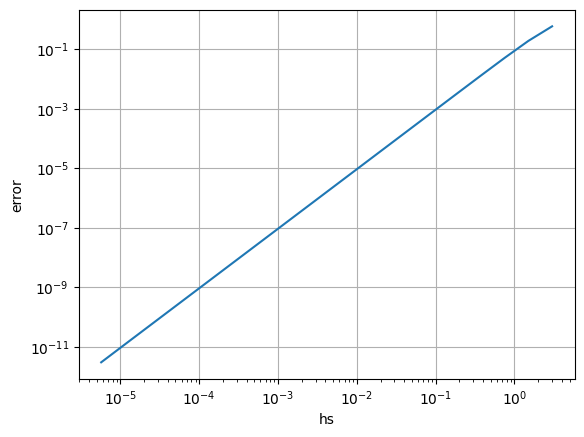

In [105]:
plt.loglog(hs, errors)
plt.xlabel("hs")
plt.grid()
plt.ylabel("error")

Here we see that the rate of convergence is roughly,
\begin{equation*}
\approx \frac{10^{-11} - 10^{-1}}{10^{-5}-10^{0}} \to \frac{10}{5} = 2
\end{equation*}
thus we have a rate of converge of $O(h^2)$. This matches the result for the error of the composite trapezoid method having the form of $Lh^2$.

## Problem \#17
Here we do something similar to question \textbf{Problem \#16} except for the integral,
\begin{equation*}
\end{equation*}

In [106]:
f = lambda x : np.exp(-1*(x**2))
exact = np.sqrt(np.pi) * scipy.special.erf(3)

# Parameters
a = -3
b = 3

estimates = [0] * 20
errors =  [0] * 20
hs =  [0] * 20

n = 1 
k = 0

while k < 20:

    # compute h
    hs[k] = ((b-a)/n)

    # compute estimate
    estimates[k] = trap(f,a,b,n)

    # compute error
    errors[k] = abs(estimates[k] - exact)

    # update rule
    k = k + 1
    n = 2**k

# Display Results
print("h        | Estimate   | Exact    | Error ")
for i in range(20):
  print("%8.2e | %8.2e   | %8.2e | %8.2e "%(hs[i], estimates[i], exact, errors[i]))

h        | Estimate   | Exact    | Error 
6.00e+00 | 7.40e-04   | 1.77e+00 | 1.77e+00 
3.00e+00 | 3.00e+00   | 1.77e+00 | 1.23e+00 
1.50e+00 | 1.82e+00   | 1.77e+00 | 4.40e-02 
7.50e-01 | 1.77e+00   | 1.77e+00 | 5.45e-05 
3.75e-01 | 1.77e+00   | 1.77e+00 | 1.62e-05 
1.88e-01 | 1.77e+00   | 1.77e+00 | 4.26e-06 
9.38e-02 | 1.77e+00   | 1.77e+00 | 1.08e-06 
4.69e-02 | 1.77e+00   | 1.77e+00 | 2.71e-07 
2.34e-02 | 1.77e+00   | 1.77e+00 | 6.78e-08 
1.17e-02 | 1.77e+00   | 1.77e+00 | 1.69e-08 
5.86e-03 | 1.77e+00   | 1.77e+00 | 4.24e-09 
2.93e-03 | 1.77e+00   | 1.77e+00 | 1.06e-09 
1.46e-03 | 1.77e+00   | 1.77e+00 | 2.65e-10 
7.32e-04 | 1.77e+00   | 1.77e+00 | 6.62e-11 
3.66e-04 | 1.77e+00   | 1.77e+00 | 1.65e-11 
1.83e-04 | 1.77e+00   | 1.77e+00 | 4.15e-12 
9.16e-05 | 1.77e+00   | 1.77e+00 | 1.05e-12 
4.58e-05 | 1.77e+00   | 1.77e+00 | 2.66e-13 
2.29e-05 | 1.77e+00   | 1.77e+00 | 8.33e-14 
1.14e-05 | 1.77e+00   | 1.77e+00 | 1.91e-14 


Text(0, 0.5, 'error')

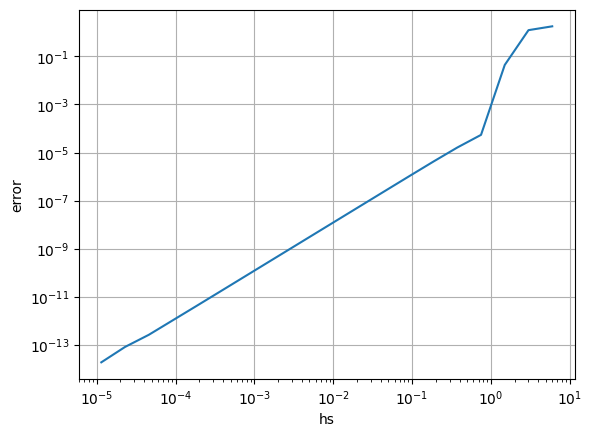

In [107]:
plt.loglog(hs, errors)
plt.grid()
plt.xlabel("hs")
plt.ylabel("error")

Here we see that the rate of convergence is roughly,
\begin{equation*}
\approx \frac{10^{-15} - 10^{-5}}{10^{-5}-10^{0}} \to \frac{10}{5} = 2
\end{equation*}
thus we have a rate of converge of $O(h^2)$. This matches the result for the error of the composite trapezoid method having the form of $Lh^2$.

Text(0, 0.5, '$y = e^{-x^2}$')

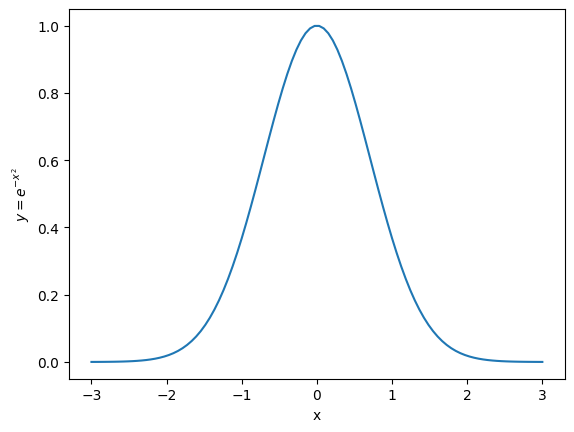

In [108]:
x = np.linspace(-3,3,100)
plt.plot(x,f(x))
plt.xlabel("x")
plt.ylabel("$y = e^{-x^2}$")

## Problem \#18
So we suspect for the Composite Trapezoidal rule, that for \textit{even} functions the rate of convergence is $O(h^2)$ while for \textit{odd} functions we suspect that the rate of convergence is $O(1)$. For example lets look at the even function,
\begin{equation*}
f(x) = \cos{x}
\end{equation*}
and the odd function
\begin{equation*}
g(x) = \sin{x}
\end{equation*}
Then since $f(x)$ is even we suspect that,
\begin{equation*}
\int_{-\pi/2}^{\pi/2}f(x)dx = 2\int_0^{\pi/2}f(x)dx = 2
\end{equation*}
and since $g(x)$ is odd we suspect that,
\begin{equation*}
\int_{-\pi/2}^{\pi/2}g(x)dx = 0
\end{equation*}

In [109]:
f = lambda x : np.cos(x)
exact = 2

# Parameters
a = -np.pi/2
b = np.pi/2

estimates = [0] * 20
errors =  [0] * 20
hs =  [0] * 20

n = 1 
k = 0

while k < 20:

    # compute h
    hs[k] = ((b-a)/n)

    # compute estimate
    estimates[k] = trap(f,a,b,n)

    # compute error
    errors[k] = abs(estimates[k] - exact)

    # update rule
    k = k + 1
    n = 2**k

# Display Results
print("h        | Estimate   | Exact    | Error ")
for i in range(20):
  print("%8.2e | %8.2e   | %8.2e | %8.2e "%(hs[i], estimates[i], exact, errors[i]))

h        | Estimate   | Exact    | Error 
3.14e+00 | 1.92e-16   | 2.00e+00 | 2.00e+00 
1.57e+00 | 1.57e+00   | 2.00e+00 | 4.29e-01 
7.85e-01 | 1.90e+00   | 2.00e+00 | 1.04e-01 
3.93e-01 | 1.97e+00   | 2.00e+00 | 2.58e-02 
1.96e-01 | 1.99e+00   | 2.00e+00 | 6.43e-03 
9.82e-02 | 2.00e+00   | 2.00e+00 | 1.61e-03 
4.91e-02 | 2.00e+00   | 2.00e+00 | 4.02e-04 
2.45e-02 | 2.00e+00   | 2.00e+00 | 1.00e-04 
1.23e-02 | 2.00e+00   | 2.00e+00 | 2.51e-05 
6.14e-03 | 2.00e+00   | 2.00e+00 | 6.27e-06 
3.07e-03 | 2.00e+00   | 2.00e+00 | 1.57e-06 
1.53e-03 | 2.00e+00   | 2.00e+00 | 3.92e-07 
7.67e-04 | 2.00e+00   | 2.00e+00 | 9.80e-08 
3.83e-04 | 2.00e+00   | 2.00e+00 | 2.45e-08 
1.92e-04 | 2.00e+00   | 2.00e+00 | 6.13e-09 
9.59e-05 | 2.00e+00   | 2.00e+00 | 1.53e-09 
4.79e-05 | 2.00e+00   | 2.00e+00 | 3.83e-10 
2.40e-05 | 2.00e+00   | 2.00e+00 | 9.57e-11 
1.20e-05 | 2.00e+00   | 2.00e+00 | 2.39e-11 
5.99e-06 | 2.00e+00   | 2.00e+00 | 6.00e-12 


Text(0, 0.5, 'error')

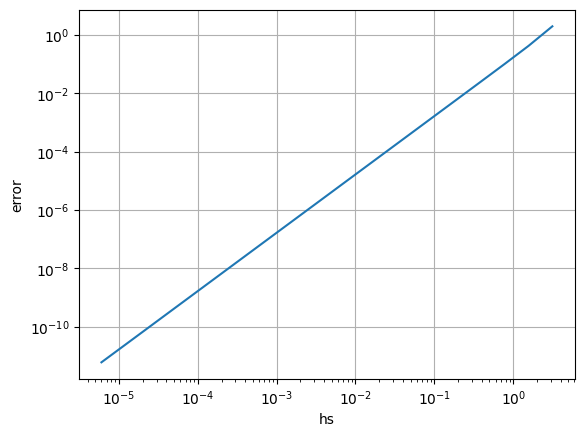

In [110]:
plt.loglog(hs, errors)
plt.xlabel("hs")
plt.grid()
plt.ylabel("error")

In [111]:
f = lambda x : np.sin(x)
exact = 0

# Parameters
a = -np.pi/2
b = np.pi/2

estimates = [0] * 20
errors =  [0] * 20
hs =  [0] * 20

n = 1 
k = 0

while k < 20:

    # compute h
    hs[k] = ((b-a)/n)

    # compute estimate
    estimates[k] = trap(f,a,b,n)

    # compute error
    errors[k] = abs(estimates[k] - exact)

    # update rule
    k = k + 1
    n = 2**k

# Display Results
print("h        | Estimate   | Exact    | Error ")
for i in range(20):
  print("%8.2e | %8.2e   | %8.2e | %8.2e "%(hs[i], estimates[i], exact, errors[i]))

h        | Estimate   | Exact    | Error 
3.14e+00 | 0.00e+00   | 0.00e+00 | 0.00e+00 
1.57e+00 | 0.00e+00   | 0.00e+00 | 0.00e+00 
7.85e-01 | 0.00e+00   | 0.00e+00 | 0.00e+00 
3.93e-01 | 0.00e+00   | 0.00e+00 | 0.00e+00 
1.96e-01 | -4.36e-17   | 0.00e+00 | 4.36e-17 
9.82e-02 | 9.81e-17   | 0.00e+00 | 9.81e-17 
4.91e-02 | -1.14e-16   | 0.00e+00 | 1.14e-16 
2.45e-02 | -2.04e-16   | 0.00e+00 | 2.04e-16 
1.23e-02 | 3.81e-17   | 0.00e+00 | 3.81e-17 
6.14e-03 | -4.29e-17   | 0.00e+00 | 4.29e-17 
3.07e-03 | -5.99e-17   | 0.00e+00 | 5.99e-17 
1.53e-03 | 1.90e-16   | 0.00e+00 | 1.90e-16 
7.67e-04 | -6.69e-17   | 0.00e+00 | 6.69e-17 
3.83e-04 | -1.21e-16   | 0.00e+00 | 1.21e-16 
1.92e-04 | -5.17e-17   | 0.00e+00 | 5.17e-17 
9.59e-05 | -2.27e-17   | 0.00e+00 | 2.27e-17 
4.79e-05 | 3.24e-17   | 0.00e+00 | 3.24e-17 
2.40e-05 | 8.99e-18   | 0.00e+00 | 8.99e-18 
1.20e-05 | 1.14e-16   | 0.00e+00 | 1.14e-16 
5.99e-06 | -5.36e-17   | 0.00e+00 | 5.36e-17 


Text(0, 0.5, 'error')

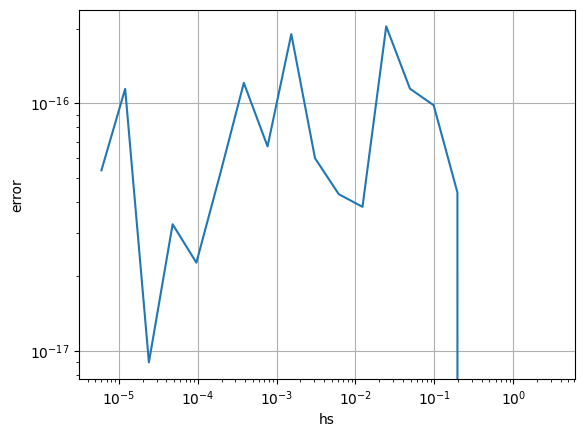

In [112]:
plt.loglog(hs, errors)
plt.xlabel("hs")
plt.grid()
plt.ylabel("error")

Here we deduce that the erratic error for $g(x)$ is due to machine error.